In [169]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import random 
import copy
import PIL 

In [170]:
path = "graph_generators/"

In [171]:
my_image = "edgelist_645.png"  

# Let's see a ER

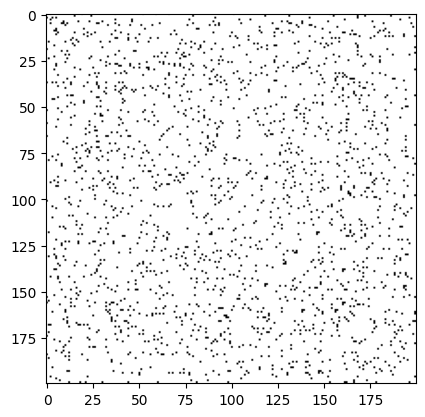

(40000, 1)


In [172]:

# Load image as grayscale
my_image = "edgelist_132.png"   

img = Image.open("graph_generators/edgelists_ER/images/" + my_image).convert('L')


plt.imshow(img, cmap='gray')
plt.show()
img = PIL.ImageOps.invert(img) # O reverse black and white after showing the image

img_arr = np.array(img)

img_vec = img_arr.reshape(-1, 1)

# Print the shape of the vector
print(img_vec.shape)


In [173]:
#print(img_vec[:100])

In [174]:
print(np.sum(img_vec)/100000) #this is indicative of the average degree!

5.0541


# Let's see a Small World

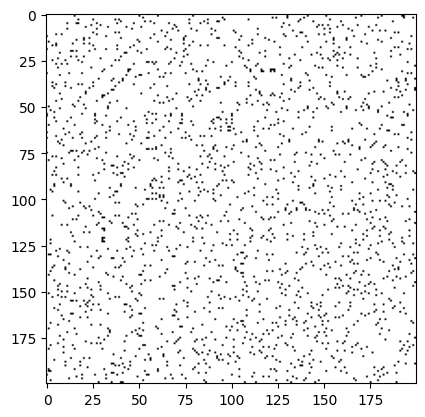

(40000, 1)


In [175]:

# Load image as grayscale
my_image = "edgelist_132.png"   

img = Image.open("graph_generators/edgelists_WS/images/" + my_image).convert('L')


plt.imshow(img, cmap='gray')
plt.show()
img = PIL.ImageOps.invert(img) # O reverse black and white after showing the image

img_arr = np.array(img)

img_vec = img_arr.reshape(-1, 1)

# Print the shape of the vector
print(img_vec.shape)


In [176]:
#print(img_vec[:100])

In [177]:
print(np.sum(img_vec)/100000) #this is indicative of the average degree!

5.1


# Let's see a Barabasi Albert

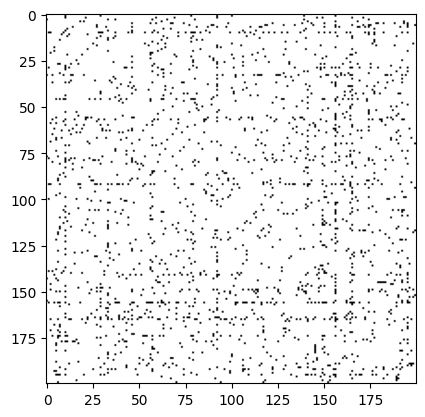

(40000, 1)


In [178]:

# Load image as grayscale
 

img = Image.open("graph_generators/edgelists_BA/images/" + my_image).convert('L')


plt.imshow(img, cmap='gray')
plt.show()
img = PIL.ImageOps.invert(img) # O reverse black and white after showing the image

img_arr = np.array(img)

img_vec = img_arr.reshape(-1, 1)

# Print the shape of the vector
print(img_vec.shape)


In [179]:
print(np.sum(img_vec)/100000) #this is indicative of the average degree!

4.9725


# Let's see a Core periphery

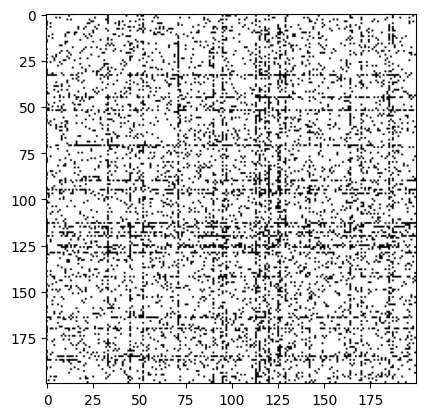

(40000, 1)


In [180]:

# Load image as grayscale
#my_image = "edgelist_132.png"   

img = Image.open("graph_generators/edgelists_COREPERIPHERY/images/" + my_image).convert('L')


plt.imshow(img, cmap='gray')
plt.show()
img = PIL.ImageOps.invert(img) # O reverse black and white after showing the image

img_arr = np.array(img)

img_vec = img_arr.reshape(-1, 1)


# Print the shape of the vector
print(img_vec.shape)


In [181]:
print(np.sum(img_vec)/100000) #this is indicative of the average degree!

17.1921


# Now let's aquire some important parameter, the resolution of each image

In [182]:
num_px = img_vec.shape[0] #this is very important! it's the dimension of the images!
num_px = float(num_px) ** (1/2)
num_px = int(num_px)
print(num_px)

200


In [183]:
print(img_vec.shape)

(40000, 1)


In [184]:
print(img_vec[3])

[0]


# Here we create the TRAIN SET

In [185]:
start = 0
stop = 199
step = 1

m = int((stop-start+1) * 4 / step) # 4 because we have 4 directories with 4 models
print(m)

400


In [186]:
trainset_x = np.zeros([num_px * num_px,m])

In [187]:
print(trainset_x.shape)

(40000, 400)


In [188]:
cartelle = ["edgelists_ER/images/", "edgelists_BA/images/", "edgelists_WS/images/", "edgelists_COREPERIPHERY/images/"]
solidi = ["edgelists_COREPERIPHERY/images/"]
randomici = [i for i in range(m)]
    
random.shuffle(randomici)

In [189]:
trainset_y = np.zeros([1,m])

In [190]:
print(trainset_y.shape)

(1, 400)


In [191]:
count = 0
x = 0
for cartella in cartelle:
    fnames = ['graph_generators/' + cartella + 'edgelist_{}.png'.format(i) for i in range(start, stop+1, step)]
    
    if cartella in solidi:
        stato = 1
    else:
        stato = 0
        
    for i in fnames:
        #print(i,stato)
        j = randomici[x]
        x += 1
        fname = i
        img = Image.open(fname).convert('L')
        img = PIL.ImageOps.invert(img)
        img_arr = np.array(img)
        img_arr = img_arr/255
        img_arr = img_arr.flatten()
        trainset_x[:,j] = img_arr
        trainset_y[0,j] = stato


    count += 100/len(cartelle)
    print ("Train set acquired to {}%".format(count))

Train set acquired to 50.0%
Train set acquired to 100.0%


# Now the test set

In [192]:
start = 900
stop = 999
step = 1

m = int((stop-start+1) * 4 / step) # again, 4 because 4 directories and 4 models
print(m)

200


In [193]:
testset_x = np.zeros([num_px * num_px,m])

In [194]:
print(testset_x.shape)

(40000, 200)


In [195]:
cartelle = ["edgelists_ER/images/", "edgelists_BA/images/", "edgelists_WS/images/", "edgelists_COREPERIPHERY/images/"]
solidi = ["edgelists_COREPERIPHERY/images/"]
randomici = [i for i in range(m)]

random.shuffle(randomici)

In [196]:
testset_y = np.zeros([1,m])

In [197]:
print(testset_y.shape)

(1, 200)


In [198]:
count = 0
x = 0
for cartella in cartelle:
    fnames = ['graph_generators/' + cartella + 'edgelist_{}.png'.format(i) for i in range(start, stop+1, step)]
    
    if cartella in solidi:
        stato = 1
    else:
        stato = 0
        
    for i in fnames:
        #print(i, stato)
        j = randomici[x]
        x += 1
        fname = i
        img = Image.open(fname).convert('L')
        img = PIL.ImageOps.invert(img)
        img_arr = np.array(img)
        img_arr = img_arr/255
        img_arr = img_arr.flatten()
        testset_x[:,j] = img_arr
        testset_y[0,j] = stato


    count += 100/len(cartelle)
    print ("Test set acquired to {}%".format(count))

Test set acquired to 50.0%
Test set acquired to 100.0%


In [199]:
train_y = trainset_y
test_y = testset_y
train_x = trainset_x
test_x = testset_x

del trainset_y
del testset_y
del trainset_x
del testset_x

In [200]:
def sigmoid(Z):

    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):

    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):

    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [201]:
def initialize_parameters_deep(layer_dims):

    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def linear_forward(A, W, b):

    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):

    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):


    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):

    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [202]:
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    print ("predictions: " + str(p))
    print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [203]:
### CONSTANTS ###
n_x = num_px * num_px 
layers_dims = [n_x, 20, 7, 5, 1] #  4-layer model

In [204]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.

        AL, caches = L_model_forward(X, parameters)

        
        # Compute cost.

        cost = compute_cost(AL, Y)

    
        # Backward propagation.

        gradients = L_model_backward(AL, Y, caches)

 
        # Update parameters.
     
        parameters = update_parameters(parameters, gradients, learning_rate)
       
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [205]:
print(train_x.shape)

(40000, 400)


In [206]:
print(test_x.shape)

(40000, 200)


In [207]:
lr = 0.01
ni = 1000

Cost after iteration 0: 0.704235
Cost after iteration 100: 0.689599
Cost after iteration 200: 0.672603
Cost after iteration 300: 0.667139
Cost after iteration 400: 0.634586
Cost after iteration 500: 0.614149
Cost after iteration 600: 0.599097
Cost after iteration 700: 0.577787
Cost after iteration 800: 0.572901
Cost after iteration 900: 0.565581


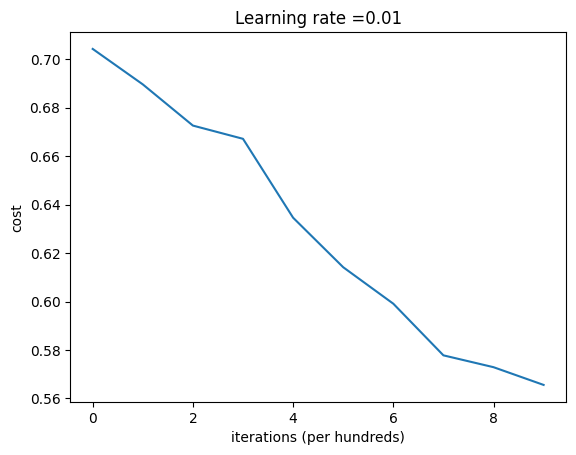

In [208]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = lr, num_iterations = ni, print_cost = True)

In [209]:
pred_train = predict(train_x, train_y, parameters)

predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.

In [210]:
pred_test = predict(test_x, test_y, parameters)

predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
true labels: [[1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
  1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
  0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
  0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.

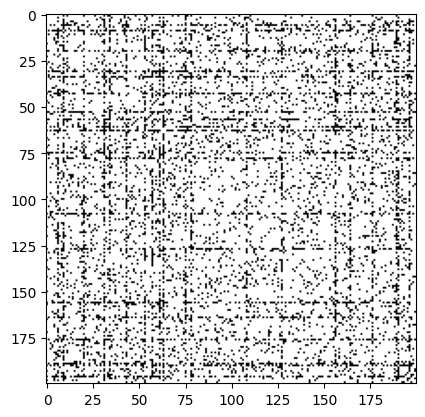

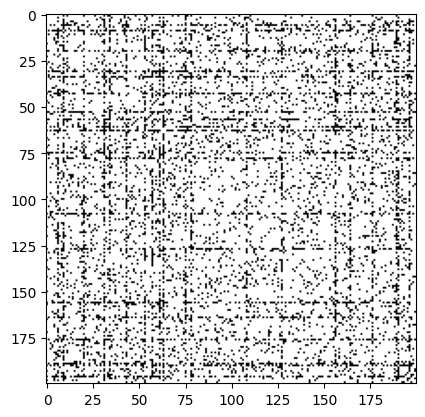

In [211]:
my_image = "edgelist_229.png"   

img = Image.open("graph_generators/edgelists_COREPERIPHERY//images/" + my_image).convert('L')
plt.imshow(img, cmap='gray')
plt.show()
img = PIL.ImageOps.invert(img)
plt.imshow(img, cmap='gray')
plt.show()
img_arr = np.array(img)
img_arr = img_arr.flatten()
img_arr = img_arr/255

In [212]:
print(img_arr[:100])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0.]


In [213]:

#here 
my_image = img_arr
my_image = my_image.reshape(-1, 1)
my_label_y = [1] # 1 is core-periphery, 0 is not! Modify this each time you analyze a picture


my_predicted_image = predict(my_image, my_label_y, parameters)



predictions: [[0.]]
true labels: [1]
Accuracy: 0.0
